# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
from datetime import datetime, timedelta
from datetime import datetime
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [3]:
data_dir = 'This PC/Documents/Digital4industry'

In [4]:
data_dir


'This PC/Documents/Digital4industry'

In [5]:
datapoints = pd.read_csv('datapoints.csv', sep=",")
datapoints.head()
datapoints['timestamp']=pd.to_datetime(datapoints['timestamp'])
datapoints.head(20)
# datapoints.info()
# dtat['Day'] = dtat['timestamp'].dt.day 
# datapoints['Month'] = datapoints['timestamp'].dt.month
# datapoints['Year'] = datapoints['timestamp'].dt.year
# datapoints['Time']=datapoints['timestamp'].dt.time
# data1['timestamp'] = pd.to_datetime(data1['timestamp'], format="%m/%d/%Y, %H:%M:%S",errors='raise')
# data10 = pd.to_datetime(data22, format='%H:%M:%S')

# datapoints

id      value                 timestamp  \
0   764c5e60-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00   
1   764c5e61-8679-11e6-a353-2f6c041e2491     33.198 2016-08-03 04:39:25+00:00   
2   764dbdf0-8679-11e6-a353-2f6c041e2491     29.300 2016-08-03 04:39:25+00:00   
3   764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110 2016-08-03 04:39:25+00:00   
4   764dbdf2-8679-11e6-a353-2f6c041e2491    459.736 2016-08-03 04:39:25+00:00   
5   76507d10-8679-11e6-a353-2f6c041e2491     64.900 2016-08-03 04:39:25+00:00   
6   76514060-8679-11e6-a353-2f6c041e2491     29.940 2016-08-03 04:47:41+00:00   
7   76514061-8679-11e6-a353-2f6c041e2491    459.344 2016-08-03 04:47:41+00:00   
8   76514062-8679-11e6-a353-2f6c041e2491      3.922 2016-08-03 04:47:41+00:00   
9   765251d0-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:47:41+00:00   
10  76553800-8679-11e6-a353-2f6c041e2491  96903.370 2016-08-03 04:47:41+00:00   
11  7655fb50-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 05:08:52+00:00   
12  7655d440-8679-11e6-a353-2f6c041e2491     63.500 2016-08-03 04:47:41+00:00   
13  76569790-8679-11e6-a353-2f6c041e2491      2.114 2016-08-03 05:08:52+00:00   
14  76569791-8679-11e6-a353-2f6c041e2491    358.964 2016-08-03 05:08:52+00:00   
15  76584540-8679-11e6-a353-2f6c041e2491     28.610 2016-08-03 05:08:52+00:00   
16  7659cbe0-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 05:14:08+00:00   
17  7659cbe1-8679-11e6-a353-2f6c041e2491  96921.450 2016-08-03 05:08:52+00:00   
18  7659cbe2-8679-11e6-a353-2f6c041e2491     68.000 2016-08-03 05:08:52+00:00   
19  765b5280-8679-11e6-a353-2f6c041e2491      1.893 2016-08-03 05:14:08+00:00   

                               sensor_id  
0   7635c920-8679-11e6-a353-2f6c041e2491  
1   763b9580-8679-11e6-a353-2f6c041e2491  
2   763ca6f0-8679-11e6-a353-2f6c041e2491  
3   763d9150-8679-11e6-a353-2f6c041e2491  
4   763701a1-8679-11e6-a353-2f6c041e2491  
5   764161e0-8679-11e6-a353-2f6c041e2491  
6   763ca6f0-8679-11e6-a353-2f6c041e2491  
7   763701a1-8679-11e6-a353-2f6c041e2491  
8   763b9580-8679-11e6-a353-2f6c041e2491  
9   7635c920-8679-11e6-a353-2f6c041e2491  
10  763d9150-8679-11e6-a353-2f6c041e2491  
11  7635c920-8679-11e6-a353-2f6c041e2491  
12  764161e0-8679-11e6-a353-2f6c041e2491  
13  763b9580-8679-11e6-a353-2f6c041e2491  
14  763701a1-8679-11e6-a353-2f6c041e2491  
15  763ca6f0-8679-11e6-a353-2f6c041e2491  
16  7635c920-8679-11e6-a353-2f6c041e2491  
17  763d9150-8679-11e6-a353-2f6c041e2491  
18  764161e0-8679-11e6-a353-2f6c041e2491  
19  763b9580-8679-11e6-a353-2f6c041e2491

In [6]:
datatypes = pd.read_csv('datatypes.csv', sep=",")
datatypes.head()




id                            type  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee                     temperature   
1  35dcb3c1-8679-11e6-bda3-ef77801087ee                        pressure   
2  35dcb3c2-8679-11e6-bda3-ef77801087ee                        humidity   
3  35dcdad0-8679-11e6-bda3-ef77801087ee    carbon dioxide concentration   
4  35dcdad1-8679-11e6-bda3-ef77801087ee  hydrogen sulfide concentration   

             si_unit type_id  
0            celcius     TCA  
1             pascal      PA  
2  relative humidity    HUMA  
3                ppm  GP_CO2  
4                ppm  GP_H2S

In [7]:
nodes = pd.read_csv('nodes.csv', sep=",")
#data3 = pd.to_datetime(data3, format='%M:%S.%f')
nodes.head()




id name description location   status  \
0  c5e39fa0-867a-11e6-a353-2f6c041e2491   N1          \N       \N  OFFLINE   
1  c147ece0-8679-11e6-a353-2f6c041e2491   N9          \N       \N  OFFLINE   
2  76309900-8679-11e6-a353-2f6c041e2491   N8          \N       \N  OFFLINE   
3  762b8ff0-8679-11e6-a353-2f6c041e2491  N10          \N       \N  OFFLINE   
4  c14ccee0-8679-11e6-a353-2f6c041e2491   N2          \N       \N  OFFLINE   

               created_at                  updated_at  \
0  2016-08-17 01:06:49+00  2016-09-29 19:28:05.932+00   
1  2016-08-07 00:51:40+00  2016-09-29 19:41:07.065+00   
2  2016-08-03 22:09:40+00  2016-09-29 19:20:17.417+00   
3  2016-08-03 04:39:25+00  2016-09-29 19:20:17.431+00   
4  2016-08-10 04:20:22+00  2016-09-29 19:20:17.523+00   

                             volcano_id  
0  35dc3e90-8679-11e6-bda3-ef77801087ee  
1  35dc3e90-8679-11e6-bda3-ef77801087ee  
2  35dc3e90-8679-11e6-bda3-ef77801087ee  
3  35dc3e90-8679-11e6-bda3-ef77801087ee  
4  35dc3e90-8679-11e6-bda3-ef77801087ee

In [8]:
sensors = pd.read_csv('sensors.csv', sep=",")
sensors.head()




id description  data_frequency   status  \
0  c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  763b9580-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763d9150-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

               created_at                  updated_at  \
0  2016-08-07 00:51:40+00  2016-09-29 19:41:07.066+00   
1  2016-08-03 04:39:25+00  2016-09-29 20:13:52.793+00   
2  2016-08-03 04:39:25+00  2016-09-29 20:13:52.797+00   
3  2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
4  2016-08-03 04:39:25+00  2016-09-29 20:13:52.811+00   

                           data_type_id                               node_id  
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
1  35dcdad2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
2  35dcdad1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491

In [9]:
volcanos = pd.read_csv('volcanos.csv', sep=",")
volcanos.head()




id    name  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   

                                         description  \
0  This is the world's biggest, baddest, most evi...   

                                   location   status  \
0  {11.985318299999999,-86.178342900000004}  OFFLINE   

                   created_at                  updated_at  
0  2016-09-29 19:16:23.419+00  2016-10-07 07:43:05.015+00

In [10]:
# data1=pd.merge(datapoints,datatypes,left_on='id')
# right_on='data_type_id',how='left'
# data1.head()

# outer_merged = pd.merge(datapoints,datatypes, how="outer", on=["id"])
# outer_merged#.head()
# outer_merged.shape
# outer_merged.drop(764c5e60-8679-11e6-a353-2f6c041e2491)

In [11]:
# plt.plot(datapoints['value'])
# plt.xticks(range(len(datapoints['0'])) , datapoints['4'])
# #plt.figure();


# matplotlib.style.use('ggplot')
# ax = datapoints.transpose().plot(kind='line', title ="sensor data", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("timestamp", fontsize=12)
# ax.set_ylabel("value", fontsize=12)
# plt.show()



# datapoints.plot(x="id",y="value")
# plt.xlabel("id",size=16)
# plt.ylabel("value",size=16)
# plt.title("Sensor Vaues Vs timestamp", size=18)



In [12]:
datapoints['Day'] = datapoints['timestamp'].dt.day 
datapoints['Month'] = datapoints['timestamp'].dt.month
datapoints['Year'] = datapoints['timestamp'].dt.year
datapoints['Time']=datapoints['timestamp'].dt.time
#plots = datapoints.groupby('sensor_id')



### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**




In [13]:
Grp_dp = datapoints.groupby('sensor_id')
Grp_dp.head(40)

id      value  \
0       764c5e60-8679-11e6-a353-2f6c041e2491     98.000   
1       764c5e61-8679-11e6-a353-2f6c041e2491     33.198   
2       764dbdf0-8679-11e6-a353-2f6c041e2491     29.300   
3       764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110   
4       764dbdf2-8679-11e6-a353-2f6c041e2491    459.736   
...                                      ...        ...   
167753  12d8bc40-e707-11e6-89c8-314aa4f67f8c    472.000   
167754  12d95880-e707-11e6-89c8-314aa4f67f8c    547.000   
167755  12dc8cd0-e707-11e6-89c8-314aa4f67f8c    470.000   
167756  12dd5020-e707-11e6-89c8-314aa4f67f8c    411.000   
167757  12ddec60-e707-11e6-89c8-314aa4f67f8c    376.000   

                       timestamp                             sensor_id  Day  \
0      2016-08-03 04:39:25+00:00  7635c920-8679-11e6-a353-2f6c041e2491    3   
1      2016-08-03 04:39:25+00:00  763b9580-8679-11e6-a353-2f6c041e2491    3   
2      2016-08-03 04:39:25+00:00  763ca6f0-8679-11e6-a353-2f6c041e2491    3   
3      2016-08-03 04:39:25+00:00  763d9150-8679-11e6-a353-2f6c041e2491    3   
4      2016-08-03 04:39:25+00:00  763701a1-8679-11e6-a353-2f6c041e2491    3   
...                          ...                                   ...  ...   
167753 2016-07-01 05:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167754 2016-07-01 06:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167755 2016-07-01 06:10:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167756 2016-07-01 06:30:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167757 2016-07-01 06:20:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   

        Month  Year      Time  
0           8  2016  04:39:25  
1           8  2016  04:39:25  
2           8  2016  04:39:25  
3           8  2016  04:39:25  
4           8  2016  04:39:25  
...       ...   ...       ...  
167753      7  2016  05:50:00  
167754      7  2016  06:00:01  
167755      7  2016  06:10:01  
167756      7  2016  06:30:01  
167757      7  2016  06:20:01  

[2440 rows x 8 columns]

In [14]:
# datapoints['sensor_id'].nunique()

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

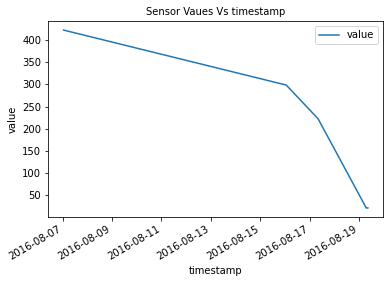

In [15]:
sensor1 = Grp_dp.get_group("c15a6370-8679-11e6-a353-2f6c041e2491")
sensor1.head(30)


sensor1.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

In [16]:

# def getgroup(sensor_id):
#     get=plots.get_group(sensor_id) 
#     sensorIndex = get.set_index('day', inplace=True)
#     groupfinal=get.groupby(["Day"], as_index=False)["value"].max()
#     return groupfinal


# sensor1 = getgroup('764c5e60-8679-11e6-a353-2f6c041e2491')



    



Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

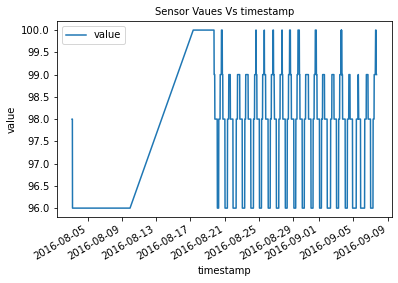

In [17]:

sensor2 = Grp_dp.get_group("7635c920-8679-11e6-a353-2f6c041e2491")
sensor2

sensor2.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

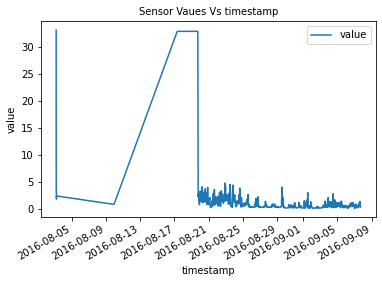

In [18]:
sensor3 = Grp_dp.get_group("763b9580-8679-11e6-a353-2f6c041e2491")
sensor3

sensor3.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

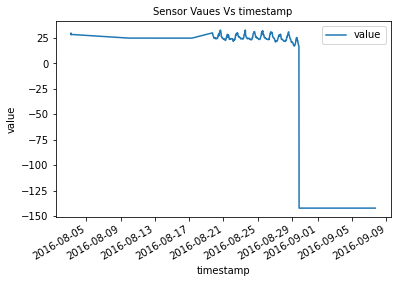

In [19]:
sensor4 = Grp_dp.get_group("763ca6f0-8679-11e6-a353-2f6c041e2491")
sensor4

sensor4.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

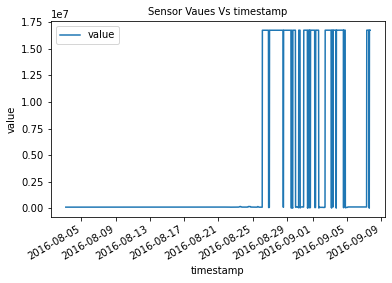

In [20]:
sensor5 = Grp_dp.get_group("763d9150-8679-11e6-a353-2f6c041e2491")
sensor5

sensor5.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

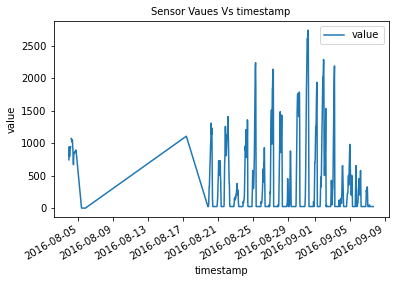

In [21]:
sensor6 = Grp_dp.get_group("7636da90-8679-11e6-a353-2f6c041e2491")
sensor6

sensor6.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

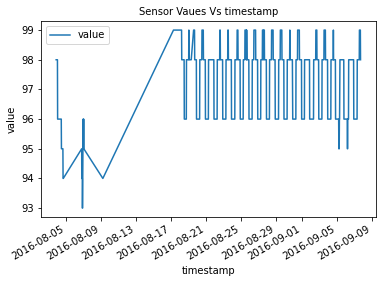

In [22]:
sensor7 = Grp_dp.get_group("76413ad0-8679-11e6-a353-2f6c041e2491")
sensor7

sensor7.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

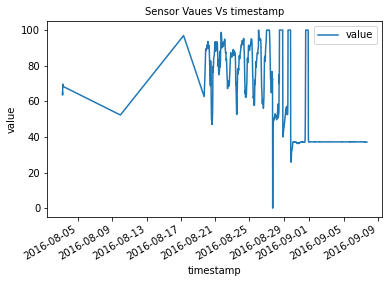

In [23]:
sensor8 = Grp_dp.get_group("764161e0-8679-11e6-a353-2f6c041e2491")
sensor8

sensor8.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

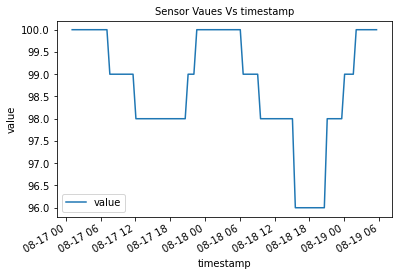

In [24]:
sensor9 = Grp_dp.get_group("c5e685d0-867a-11e6-a353-2f6c041e2491")
sensor9

sensor9.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

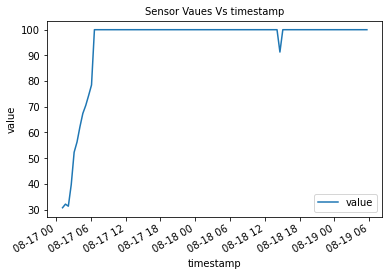

In [25]:
sensor10 = Grp_dp.get_group("c5e9ba20-867a-11e6-a353-2f6c041e2491")
sensor10

sensor10.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

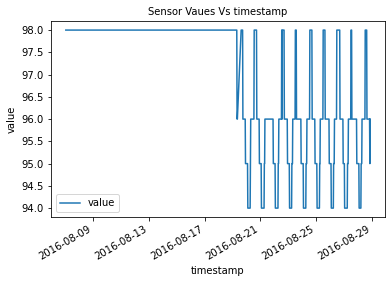

In [26]:
sensor11 = Grp_dp.get_group("c159c730-8679-11e6-a353-2f6c041e2491")
sensor11

sensor11.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

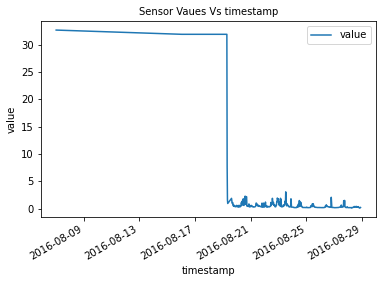

In [27]:
sensor12 = Grp_dp.get_group("c159ee40-8679-11e6-a353-2f6c041e2491")
sensor12

sensor12.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

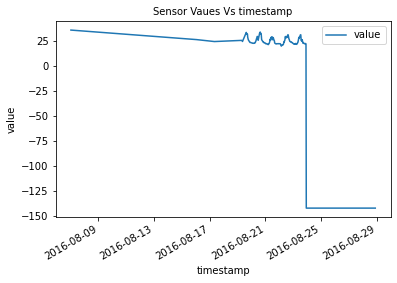

In [28]:
sensor13 = Grp_dp.get_group("c15a6371-8679-11e6-a353-2f6c041e2491")
sensor13

sensor13.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

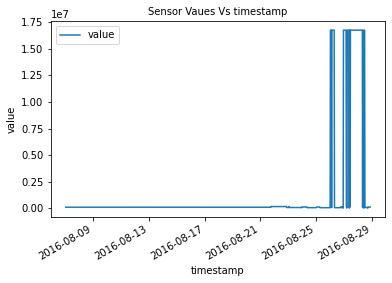

In [29]:
sensor14 = Grp_dp.get_group("c15a6372-8679-11e6-a353-2f6c041e2491")
sensor14

sensor14.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

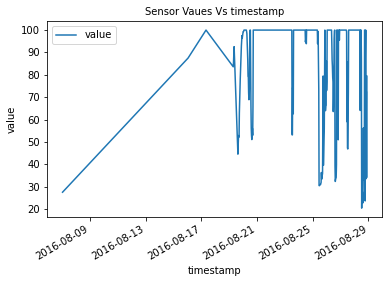

In [30]:
sensor15 = Grp_dp.get_group("c15c5f40-8679-11e6-a353-2f6c041e2491")
sensor15

sensor15.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

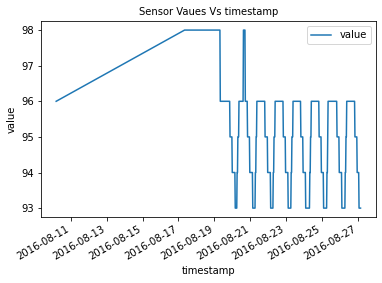

In [31]:
sensor16 = Grp_dp.get_group("c15ef750-8679-11e6-a353-2f6c041e2491")
sensor16

sensor16.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

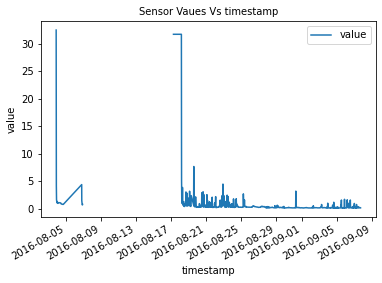

In [32]:
sensor17 = Grp_dp.get_group("76427350-8679-11e6-a353-2f6c041e2491")
sensor17

sensor17.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

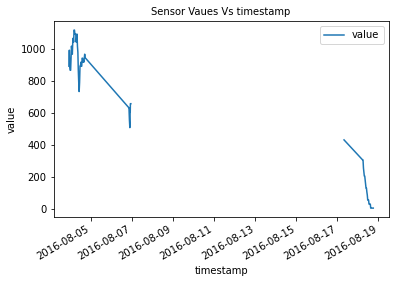

In [33]:
sensor18 = Grp_dp.get_group("76427351-8679-11e6-a353-2f6c041e2491")
sensor18

sensor18.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

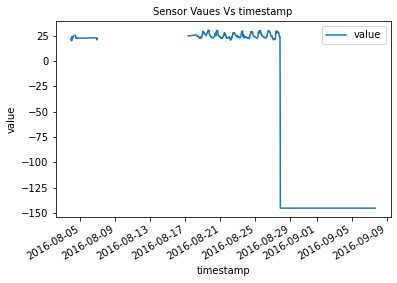

In [34]:
sensor19 = Grp_dp.get_group("7644bd40-8679-11e6-a353-2f6c041e2491")
sensor19

sensor19.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

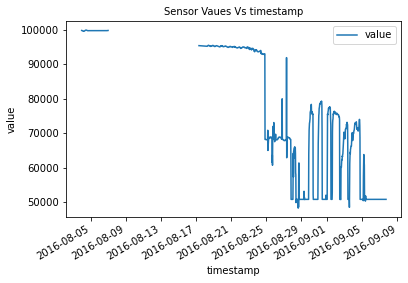

In [35]:
sensor20 = Grp_dp.get_group("7645ceb0-8679-11e6-a353-2f6c041e2491")
sensor20

sensor20.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

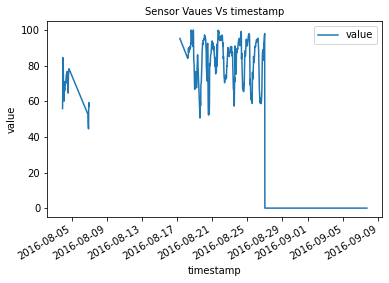

In [36]:
sensor21 = Grp_dp.get_group("7645ceb1-8679-11e6-a353-2f6c041e2491")
sensor21

sensor21.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

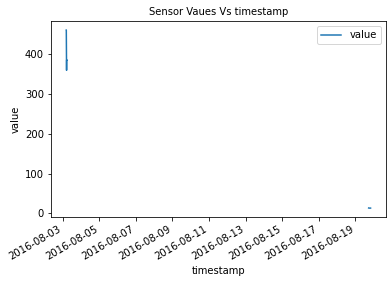

In [37]:
sensor22 = Grp_dp.get_group("763701a1-8679-11e6-a353-2f6c041e2491")
sensor22

sensor22.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

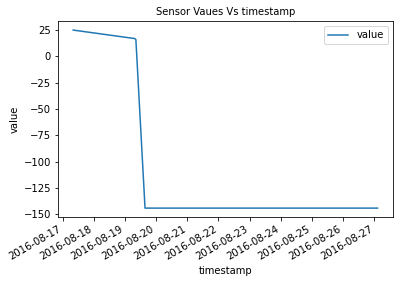

In [38]:
sensor23 = Grp_dp.get_group("c15f9391-8679-11e6-a353-2f6c041e2491")
sensor23

sensor23.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

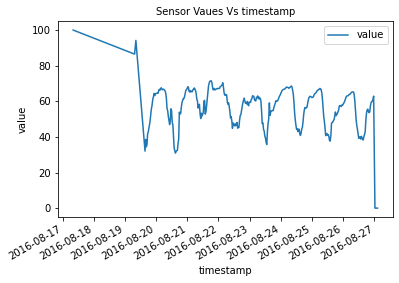

In [39]:
sensor24 = Grp_dp.get_group("c162c7e0-8679-11e6-a353-2f6c041e2491")
sensor24

sensor24.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

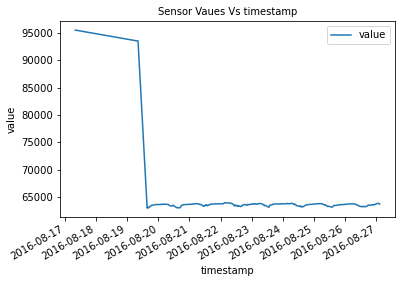

In [40]:
sensor25 = Grp_dp.get_group("c15f9390-8679-11e6-a353-2f6c041e2491")
sensor25

sensor25.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

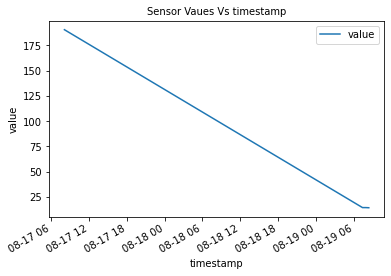

In [41]:
sensor26 = Grp_dp.get_group("c15fbaa0-8679-11e6-a353-2f6c041e2491")
sensor26

sensor26.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

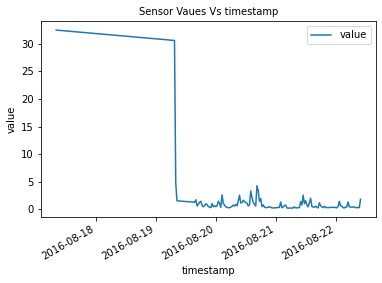

In [42]:
sensor27 = Grp_dp.get_group("c15fbaa1-8679-11e6-a353-2f6c041e2491")
sensor27

sensor27.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

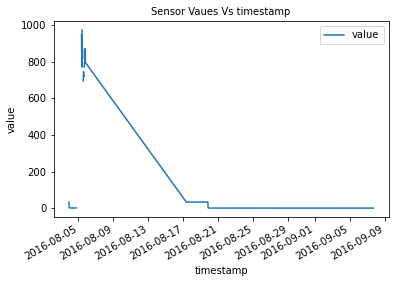

In [43]:
sensor28 = Grp_dp.get_group("763701a0-8679-11e6-a353-2f6c041e2491")
sensor28

sensor28.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

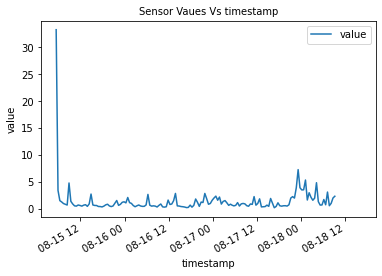

In [44]:
sensor29 = Grp_dp.get_group("d3cea980-8679-11e6-a353-2f6c041e2491")
sensor29

sensor29.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

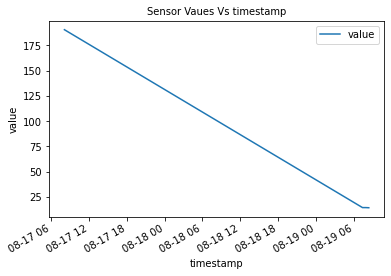

In [45]:
sensor30 = Grp_dp.get_group("c15fbaa0-8679-11e6-a353-2f6c041e2491")
sensor30

sensor30.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

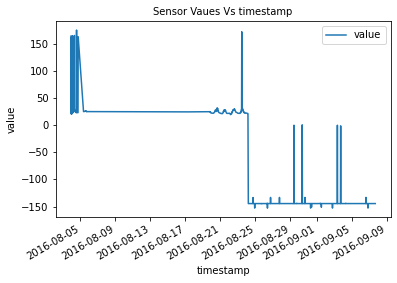

In [46]:
sensor30 = Grp_dp.get_group("763bbc90-8679-11e6-a353-2f6c041e2491")
sensor30

sensor30.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

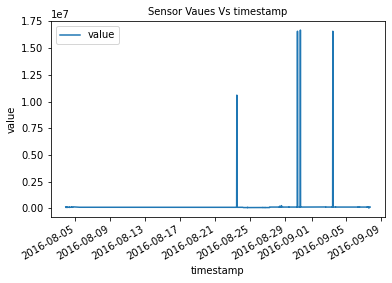

In [47]:
sensor31 = Grp_dp.get_group("763d6a40-8679-11e6-a353-2f6c041e2491")
sensor31

sensor31.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

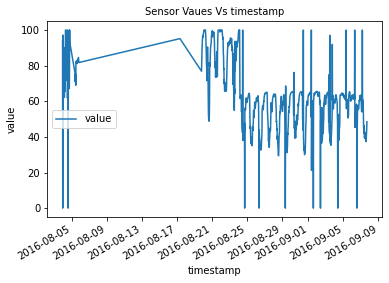

In [48]:
sensor32 = Grp_dp.get_group("76402960-8679-11e6-a353-2f6c041e2491")
sensor32

sensor32.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

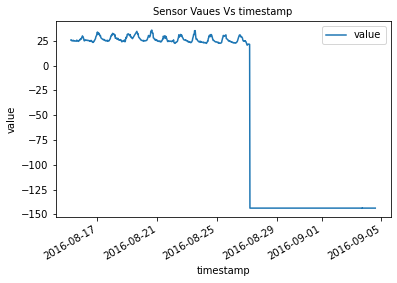

In [49]:
sensor33 = Grp_dp.get_group("d3cf6cd0-8679-11e6-a353-2f6c041e2491")
sensor33

sensor33.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

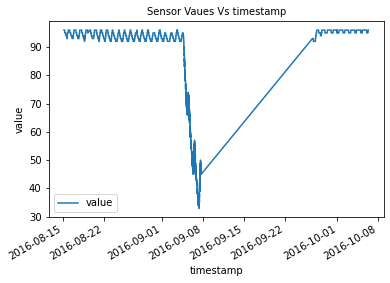

In [50]:
sensor34 = Grp_dp.get_group("d3cd7100-8679-11e6-a353-2f6c041e2491")
sensor34

sensor34.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

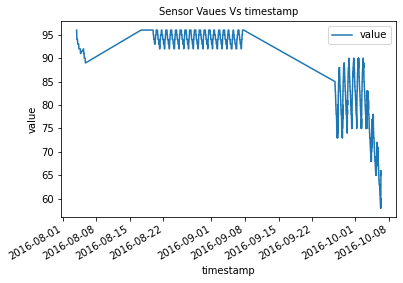

In [51]:
sensor35 = Grp_dp.get_group("7635f030-8679-11e6-a353-2f6c041e2491")
sensor35

sensor35.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

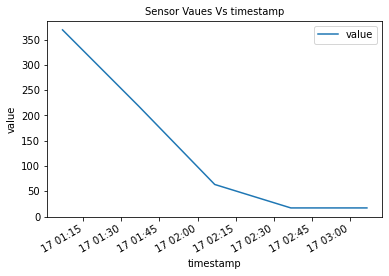

In [52]:
sensor36 = Grp_dp.get_group("c5e80c70-867a-11e6-a353-2f6c041e2491")
sensor36

sensor36.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

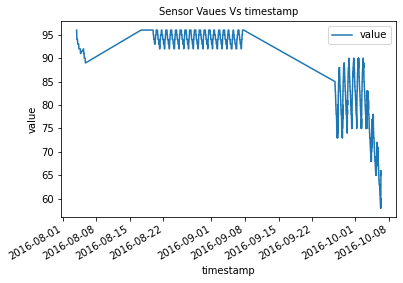

In [53]:
sensor37 = Grp_dp.get_group("7635f030-8679-11e6-a353-2f6c041e2491")
sensor37

sensor37.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

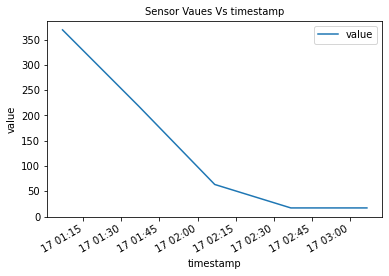

In [54]:
sensor38 = Grp_dp.get_group("c5e80c70-867a-11e6-a353-2f6c041e2491")
sensor38

sensor38.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

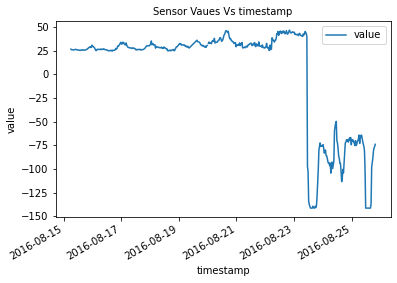

In [55]:
sensor39 = Grp_dp.get_group("d3d909c1-8679-11e6-a353-2f6c041e2491")
sensor39

sensor39.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

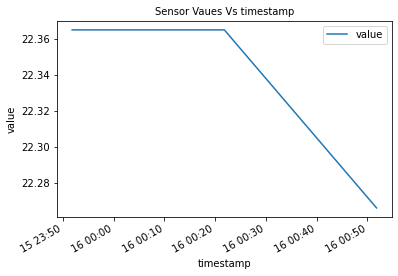

In [56]:
sensor40 = Grp_dp.get_group("d3cf45c0-8679-11e6-a353-2f6c041e2491")
sensor40

sensor40.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

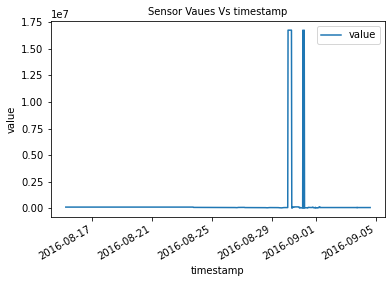

In [57]:
sensor41 = Grp_dp.get_group("d3d0cc60-8679-11e6-a353-2f6c041e2491")
sensor41

sensor41.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

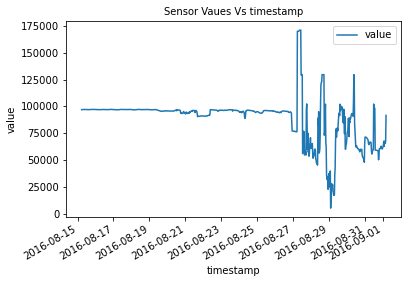

In [58]:
sensor42 = Grp_dp.get_group("d3d56040-8679-11e6-a353-2f6c041e2491")
sensor42

sensor42.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

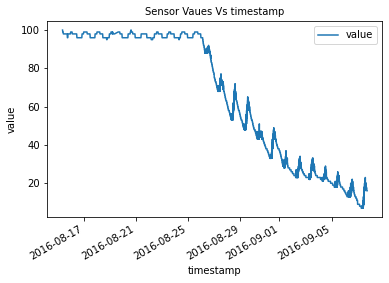

In [59]:
sensor43 = Grp_dp.get_group("e66592c0-8679-11e6-a353-2f6c041e2491")
sensor43

sensor43.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

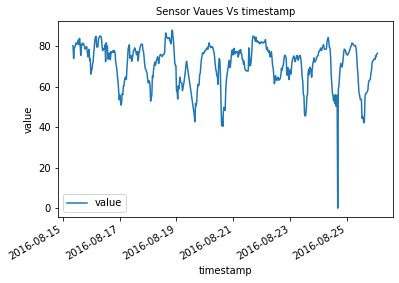

In [60]:
sensor44 = Grp_dp.get_group("e6691530-8679-11e6-a353-2f6c041e2491")
sensor44

sensor44.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

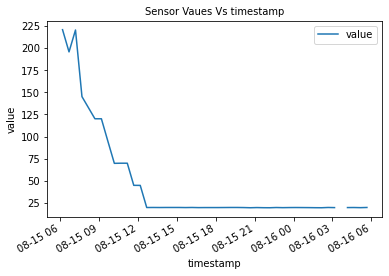

In [61]:
sensor45 = Grp_dp.get_group("d3d909c0-8679-11e6-a353-2f6c041e2491")
sensor45

sensor45.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

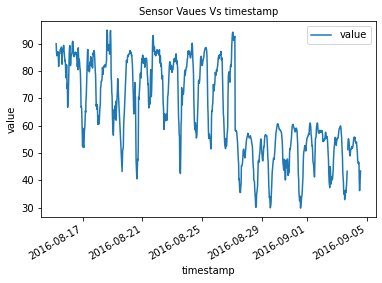

In [62]:
sensor46 = Grp_dp.get_group("d3d168a0-8679-11e6-a353-2f6c041e2491")
sensor46

sensor46.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

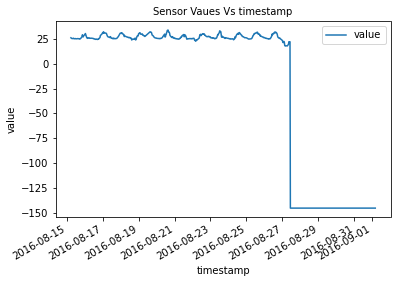

In [63]:
sensor47 = Grp_dp.get_group("d3d53930-8679-11e6-a353-2f6c041e2491")
sensor47

sensor47.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

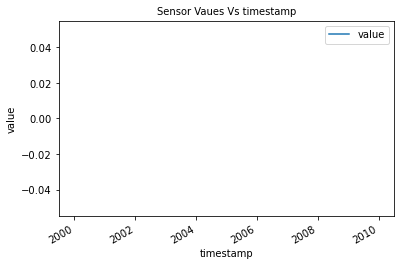

In [64]:
sensor48 = Grp_dp.get_group("e66851e1-8679-11e6-a353-2f6c041e2491")
sensor48

sensor48.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

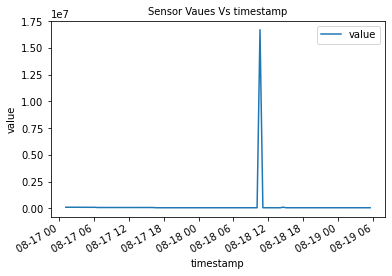

In [65]:
sensor49 = Grp_dp.get_group("c5e8a8b0-867a-11e6-a353-2f6c041e2491")
sensor49

sensor49.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

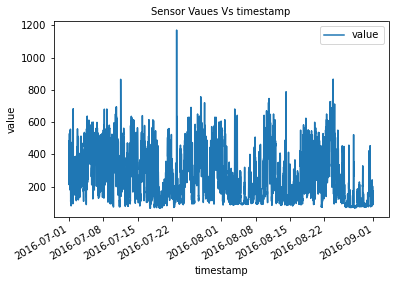

In [66]:
sensor50 = Grp_dp.get_group("1248ff60-e707-11e6-89c8-314aa4f67f8c")
sensor50

sensor50.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

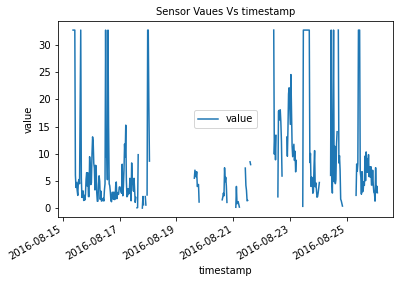

In [67]:
sensor51 = Grp_dp.get_group("e6678e90-8679-11e6-a353-2f6c041e2491")
sensor51

sensor51.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

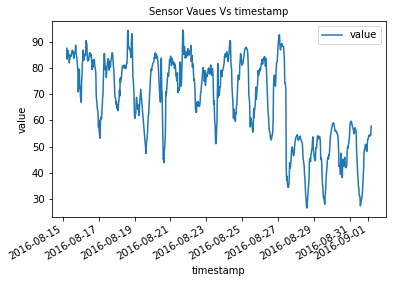

In [68]:
sensor52 = Grp_dp.get_group("d3d698c0-8679-11e6-a353-2f6c041e2491")
sensor52

sensor52.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

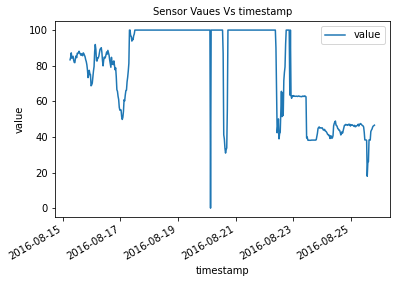

In [69]:
sensor53 = Grp_dp.get_group("d3db2ca0-8679-11e6-a353-2f6c041e2491")
sensor53

sensor53.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

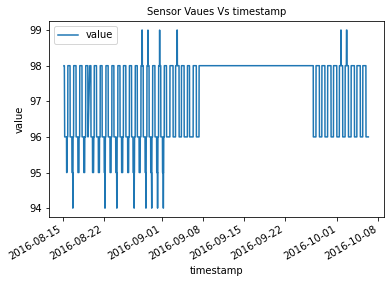

In [70]:
sensor54 = Grp_dp.get_group("d3d33d60-8679-11e6-a353-2f6c041e2491")
sensor54

sensor54.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

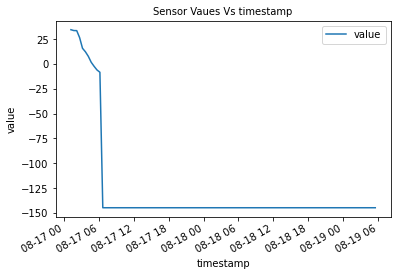

In [71]:
sensor55 = Grp_dp.get_group("c5e881a1-867a-11e6-a353-2f6c041e2491")
sensor55

sensor55.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

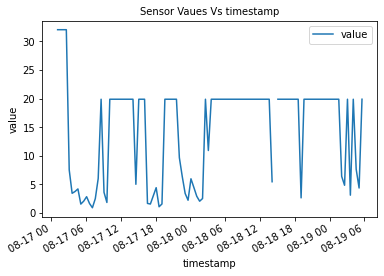

In [72]:
sensor56 = Grp_dp.get_group("c5e881a0-867a-11e6-a353-2f6c041e2491")
sensor56

sensor56.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

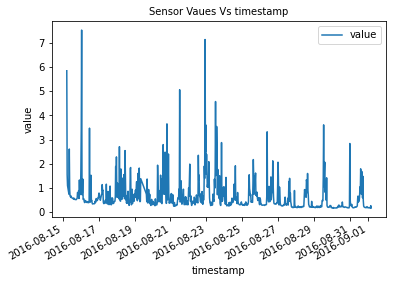

In [73]:
sensor57 = Grp_dp.get_group("d3d3b290-8679-11e6-a353-2f6c041e2491")
sensor57

sensor57.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

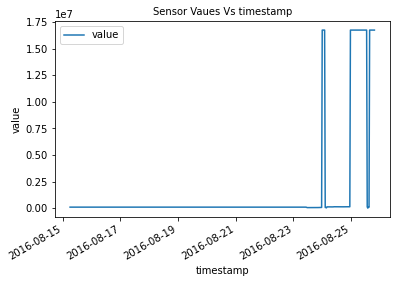

In [74]:
sensor58 = Grp_dp.get_group("d3db53b0-8679-11e6-a353-2f6c041e2491")
sensor58

sensor58.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

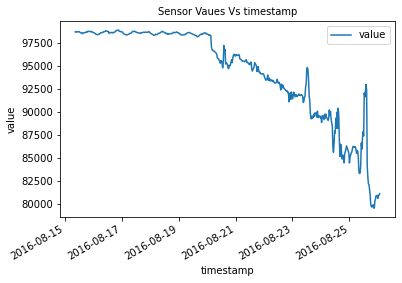

In [75]:
sensor59 = Grp_dp.get_group("e66851e0-8679-11e6-a353-2f6c041e2491")
sensor59

sensor59.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

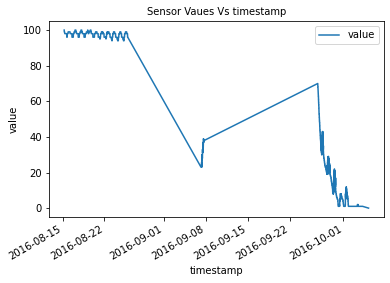

In [76]:
sensor60 = Grp_dp.get_group("d3d73500-8679-11e6-a353-2f6c041e2491")
sensor60

sensor60.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

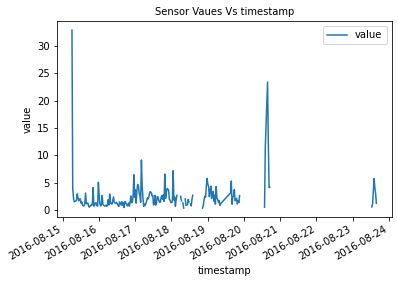

In [77]:
sensor61 = Grp_dp.get_group("d3d7d140-8679-11e6-a353-2f6c041e2491")
sensor61

sensor61.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

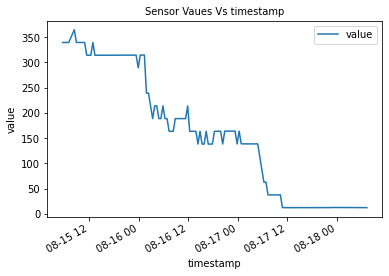

In [78]:
sensor64 = Grp_dp.get_group("d3d3b291-8679-11e6-a353-2f6c041e2491")
sensor64

sensor64.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

Text(0.5, 1.0, 'Sensor Vaues Vs timestamp')

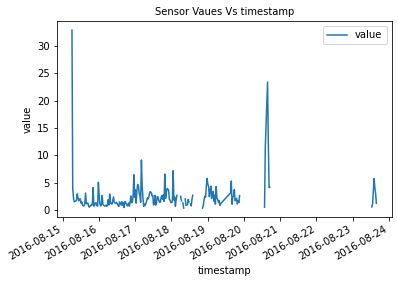

In [79]:
sensor65 = Grp_dp.get_group("e6678e91-8679-11e6-a353-2f6c041e2491")
sensor65

sensor61.plot(x="timestamp",y="value")
plt.xlabel("timestamp",size=10)
plt.ylabel("value",size=10)
plt.title("Sensor Vaues Vs timestamp", size=10)

In [80]:


# # sensor1 = getgroup('764c5e60-8679-11e6-a353-2f6c041e2491')

# datapoints.plot(x="timestamp",y="value")
# plt.xlabel("timestamp",size=10)
# plt.ylabel("value",size=10)
# plt.title("Sensor Vaues Vs timestamp", size=10)

# # plt.figure(figure(figsize=(25,5))
# # plt.figure(figsize=(25,5))
# # plt.subplot(1,1,1)
# # custom_plot(x=sensor1.index, y=sensor1.value)
# # plt.title('Maximum Daily Values for c15q6370 Sensor')



In [81]:
pd.options.plotting.backend = "plotly"
df.plot(x='date', y=['sessions', 'cost'])

NameError: name 'df' is not defined

### 3.0 Descriptive Analysis One data frame at a time *
3.1: How many sensors of each type are there?






In [ ]:
sensors.data_type_id.value_counts()

In [ ]:
datapoints.sensor_id.value_counts()

In [ ]:
datatypes.id.value_counts()

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Take the raw `datapoints` data frame and merge it with all the `sensors` and their types.

In [129]:

full3= pd.merge(datatypes, sensors, left_on='id', right_on='data_type_id', how='left')
full3.head()



#  right_on='data_type_id',
# full = pd.merge(data, s2, left_on='sensor_id', right_on='id_x')

id_x         type  si_unit type_id  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
1  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
2  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
4  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   

                                   id_y description  data_frequency   status  \
0  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  c15a6371-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  7644bd40-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  c15f9391-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763bbc90-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

               created_at                  updated_at  \
0  2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
1  2016-08-07 00:51:40+00  2016-09-29 20:13:52.836+00   
2  2016-08-03 22:09:40+00  2016-09-29 19:20:17.417+00   
3  2016-08-10 04:20:22+00  2016-09-29 19:20:17.516+00   
4  2016-08-03 21:50:32+00  2016-09-30 18:12:04.578+00   

                           data_type_id                               node_id  
0  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
1  35dcb3c0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
2  35dcb3c0-8679-11e6-bda3-ef77801087ee  76309900-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  c14ccee0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c0-8679-11e6-bda3-ef77801087ee  762c5340-8679-11e6-a353-2f6c041e2491

In [132]:
datapoints.head()

id      value                 timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198 2016-08-03 04:39:25+00:00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300 2016-08-03 04:39:25+00:00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110 2016-08-03 04:39:25+00:00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736 2016-08-03 04:39:25+00:00   

                              sensor_id  Day  Month  Year      Time  
0  7635c920-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25  
1  763b9580-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25  
2  763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25  
3  763d9150-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25  
4  763701a1-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25

In [136]:
full5= pd.merge(datapoints, full3, left_on='sensor_id', right_on='id_y', how='left')
full5.head()

full6= full5.drop(['id_y','description','data_frequency','status','created_at','updated_at'],axis=1)

In [244]:
full6.head()

id      value                 timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198 2016-08-03 04:39:25+00:00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300 2016-08-03 04:39:25+00:00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110 2016-08-03 04:39:25+00:00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736 2016-08-03 04:39:25+00:00   

                              sensor_id  Day  Month  Year      Time  \
0  7635c920-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
1  763b9580-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
2  763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
3  763d9150-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
4  763701a1-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   

                                   id_x                            type  \
0  35dcdad2-8679-11e6-bda3-ef77801087ee                         battery   
1  35dcdad1-8679-11e6-bda3-ef77801087ee  hydrogen sulfide concentration   
2  35dcb3c0-8679-11e6-bda3-ef77801087ee                     temperature   
3  35dcb3c1-8679-11e6-bda3-ef77801087ee                        pressure   
4  35dcdad0-8679-11e6-bda3-ef77801087ee    carbon dioxide concentration   

      si_unit type_id                          data_type_id  \
0  percentage     BAT  35dcdad2-8679-11e6-bda3-ef77801087ee   
1         ppm  GP_H2S  35dcdad1-8679-11e6-bda3-ef77801087ee   
2     celcius     TCA  35dcb3c0-8679-11e6-bda3-ef77801087ee   
3      pascal      PA  35dcb3c1-8679-11e6-bda3-ef77801087ee   
4         ppm  GP_CO2  35dcdad0-8679-11e6-bda3-ef77801087ee   

                                node_id  
0  762b8ff0-8679-11e6-a353-2f6c041e2491  
1  762b8ff0-8679-11e6-a353-2f6c041e2491  
2  762b8ff0-8679-11e6-a353-2f6c041e2491  
3  762b8ff0-8679-11e6-a353-2f6c041e2491  
4  762b8ff0-8679-11e6-a353-2f6c041e2491

we have to merge the sensor data and Datatypes together, this is merging the sensor id and sensor values with sensor data types so as to link each sensor value to each sensor 

-----

### 5.0 Time Series based analysis

Now, we are going to take this stitched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

     Note: If by this point the time stamp is not in datetime format, make sure it is in datetime format.
    Step 1: Resample the dataset to the daily level. (One observation per date)
    Step 2: For the resampled data, calculate the daily mean, min and max values for each sensor id.

In [144]:
full6['Day'] = full6['timestamp'].dt.day 
full6['Month'] = full6['timestamp'].dt.month
full6['Year'] = full6['timestamp'].dt.year
full6['Time']=full6['timestamp'].dt.time
#plots = datapoints.groupby('sensor_id')

# daily = full3.groupby("sensor_id")['value'].resample('D')

Resample to get daily averages.
Then subset to select the rows you need.

In [251]:

# daily = full3.groupby("sensor_id")['value'].resample('D')

daily = full6.groupby("Day")
daily.head(3)
# Grp_day = datapoints.groupby('Day')
# Grp_day.head(5)

id    value  \
0       764c5e60-8679-11e6-a353-2f6c041e2491   98.000   
1       764c5e61-8679-11e6-a353-2f6c041e2491   33.198   
2       764dbdf0-8679-11e6-a353-2f6c041e2491   29.300   
89      768b8a40-8679-11e6-a353-2f6c041e2491   98.000   
91      768bff70-8679-11e6-a353-2f6c041e2491  869.184   
...                                      ...      ...   
168999  1a3d6f80-e707-11e6-89c8-314aa4f67f8c   86.000   
169000  1a429fa0-e707-11e6-89c8-314aa4f67f8c  178.000   
169461  1ad25c80-e707-11e6-89c8-314aa4f67f8c  271.000   
169462  1ad7b3b0-e707-11e6-89c8-314aa4f67f8c  292.000   
169463  1adc4790-e707-11e6-89c8-314aa4f67f8c  509.000   

                       timestamp                             sensor_id  Day  \
0      2016-08-03 04:39:25+00:00  7635c920-8679-11e6-a353-2f6c041e2491    3   
1      2016-08-03 04:39:25+00:00  763b9580-8679-11e6-a353-2f6c041e2491    3   
2      2016-08-03 04:39:25+00:00  763ca6f0-8679-11e6-a353-2f6c041e2491    3   
89     2016-08-04 00:09:21+00:00  76413ad0-8679-11e6-a353-2f6c041e2491    4   
91     2016-08-04 00:09:21+00:00  76427351-8679-11e6-a353-2f6c041e2491    4   
...                          ...                                   ...  ...   
168999 2016-07-13 01:50:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   13   
169000 2016-07-13 02:40:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   13   
169461 2016-07-14 00:50:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   14   
169462 2016-07-14 01:30:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   14   
169463 2016-07-14 02:10:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   14   

        Month  Year      Time                                  id_x  \
0           8  2016  04:39:25  35dcdad2-8679-11e6-bda3-ef77801087ee   
1           8  2016  04:39:25  35dcdad1-8679-11e6-bda3-ef77801087ee   
2           8  2016  04:39:25  35dcb3c0-8679-11e6-bda3-ef77801087ee   
89          8  2016  00:09:21  35dcdad2-8679-11e6-bda3-ef77801087ee   
91          8  2016  00:09:21  35dcdad0-8679-11e6-bda3-ef77801087ee   
...       ...   ...       ...                                   ...   
168999      7  2016  01:50:01  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169000      7  2016  02:40:01  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169461      7  2016  00:50:02  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169462      7  2016  01:30:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169463      7  2016  02:10:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                  type     si_unit type_id  \
0                              battery  percentage     BAT   
1       hydrogen sulfide concentration         ppm  GP_H2S   
2                          temperature     celcius     TCA   
89                             battery  percentage     BAT   
91        carbon dioxide concentration         ppm  GP_CO2   
...                                ...         ...     ...   
168999                            RSAM      counts    RSAM   
169000                            RSAM      counts    RSAM   
169461                            RSAM      counts    RSAM   
169462                            RSAM      counts    RSAM   
169463                            RSAM      counts    RSAM   

                                data_type_id  \
0       35dcdad2-8679-11e6-bda3-ef77801087ee   
1       35dcdad1-8679-11e6-bda3-ef77801087ee   
2       35dcb3c0-8679-11e6-bda3-ef77801087ee   
89      35dcdad2-8679-11e6-bda3-ef77801087ee   
91      35dcdad0-8679-11e6-bda3-ef77801087ee   
...                                      ...   
168999  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169000  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169461  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169462  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
169463  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                     node_id  
0       762b8ff0-8679-11e6-a353-2f6c041e2491  
1       762b8ff0-8679-11e6-a353-2f6c041e2491  
2       762b8ff0-8679-11e6-a353-2f6c041e2491  
89      76309900-8679-11e6-a353-2f6c041e2491 

In [169]:
data_p = pd.pivot_table(full6,index=["sensor_id",'type_id','Day'], values=['value'],aggfunc=[np.min,np.mean,np.max])
data_p.head()

amin        mean   amax
                                                 value       value  value
sensor_id                            type_id Day                         
1248ff60-e707-11e6-89c8-314aa4f67f8c RSAM    1    81.0  298.744755  683.0
                                             2    88.0  225.734266  558.0
                                             3    85.0  224.503497  681.0
                                             4    89.0  266.419580  642.0
                                             5    88.0  277.021201  612.0

In [121]:
mean = daily.mean().mean()
mean.head()

value             98058.114801
Month                 8.211580
Year               2016.000000
data_frequency             NaN
dtype: float64

In [123]:
Max = daily.max().max()
Max.head()



id_x         ffffeab0-8b82-11e6-ad43-49bd404a7931
value                                 1.67729e+07
timestamp               2016-10-06 07:32:51+00:00
sensor_id    e6691530-8679-11e6-a353-2f6c041e2491
Month                                          10
dtype: object

In [124]:
Min = Grp_day.min().min()
Min.head()



id           00008920-86b0-11e6-b9eb-2b0883ebdaeb
value                                     -152.97
timestamp               2016-07-01 00:00:31+00:00
sensor_id    1248ff60-e707-11e6-89c8-314aa4f67f8c
Month                                           7
dtype: object

### 6.0 Correlations Analysis

The goal of the next task is to eventually perform a correlation analysis.

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/example-2.png" width=450 height=200>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their type id's

In [148]:
criteria = full6.type_id == 'TCA'
plt.figure(figsize=(20,10))
full6[criteria]['value'].plot()

<Figure size 1440x720 with 0 Axes>

In [165]:
 s2 = full6
temp_sensors = [s for s in s2[s2.type_id =='TCA']['id_x']]

# temperature_senors = [s for t,s in zip(s2['type_id'], s2['id_x']) if t=='TCA'] # alternative way
temp_sensors
# .nunique()

['35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-11e6-bda3-ef77801087ee',
 '35dcb3c0-8679-

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

In [172]:
groupy = full6.groupby('type_id')
temp_sensor = groupy.get_group('TCA')


<Figure size 1440x360 with 0 Axes>

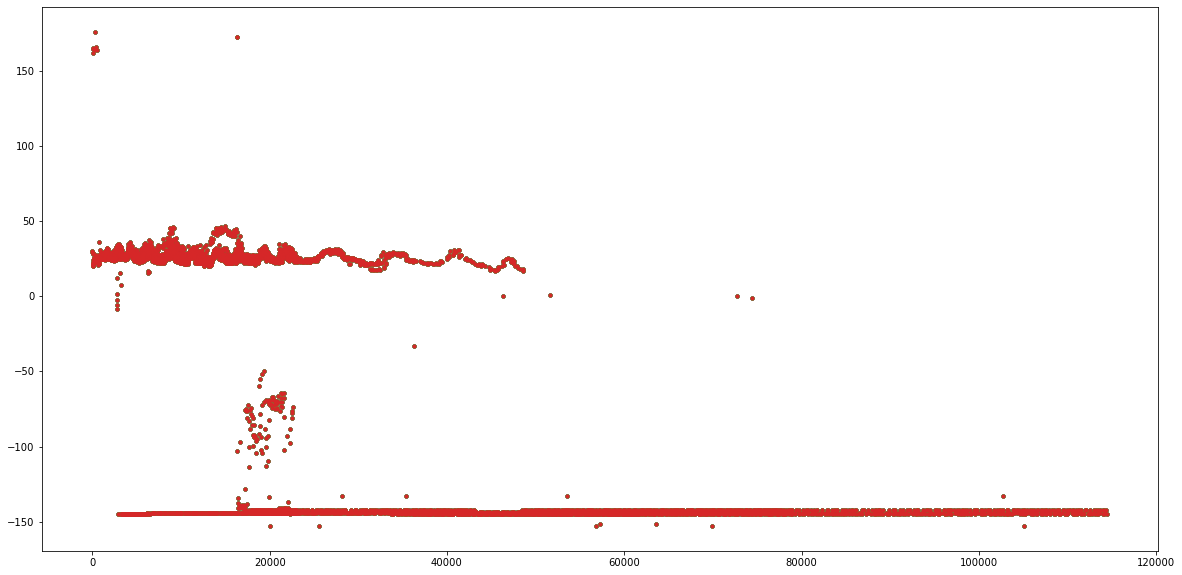

In [195]:
plt.figure(figsize=(20,5))

# for s in temp_sensors:
#     #print(s)
#     sub_df = full6[full6['sensor_id']==s]
#     plt.plot(sub_df.index, sub_df['value'], '.')
     
plt.figure(figsize=(20,10))
for s in temp_sensor:
    plt.plot(temp_sensor.index, temp_sensor['value'], '.',)

    


This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

In [202]:
# fig, axarr = plt.subplots(5, sharex=True)
# fig.set_size_inches(20,30) 

# plt.figure(figsize=(20,5))
# for i,s in enumerate(temp_sensors):
#     sub_df = full6[full6['sensor_id']==s]
#     axarr[i].plot(sub_df.index, sub_df['value'], '.')


In [241]:
sensors.tail()
sensors.describe()

sensor2= sensors.fillna((sensors.mean()))
sensor2

id description  data_frequency   status  \
0   c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1   7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2   763b9580-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3   763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4   763d9150-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
..                                   ...         ...             ...      ...   
56  e66851e0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
57  d3d73500-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
58  d3d7d140-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
59  d3d3b291-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
60  e6678e91-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

                created_at                  updated_at  \
0   2016-08-07 00:51:40+00  2016-09-29 19:41:07.066+00   
1   2016-08-03 04:39:25+00  2016-09-29 20:13:52.793+00   
2   2016-08-03 04:39:25+00  2016-09-29 20:13:52.797+00   
3   2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
4   2016-08-03 04:39:25+00  2016-09-29 20:13:52.811+00   
..                     ...                         ...   
56  2016-08-15 08:46:05+00  2016-09-29 20:13:52.902+00   
57  2016-08-15 06:10:39+00  2016-10-05 12:42:18.933+00   
58  2016-08-15 06:10:39+00  2016-09-30 18:12:04.584+00   
59  2016-08-15 05:31:29+00  2016-09-30 18:12:04.585+00   
60  2016-08-15 08:46:05+00  2016-09-29 20:13:52.905+00   

                            data_type_id                               node_id  
0   35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
1   35dcdad2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
2   35dcdad1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
3   35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
4   35dcb3c1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
..                                   ...                                   ...  
56  35dcb3c1-8679-11e6-bda3-ef77801087ee  e662fab0-8679-11e6-a353-2f6c041e2491  
57  35dcdad2-8679-11e6-bda3-ef77801087ee  d3cbc350-8679-11e6-a353-2f6c041e2491  
58  35dcdad1-8679-11e6-bda3-ef77801087ee  d3cbc350-8679-11e6-a353-2f6c041e2491  
59  35dcdad0-8679-11e6-bda3-ef77801087ee  d3cb7530-8679-11e6-a353-2f6c041e2491  
60  35dcb3c0-8679-11e6-bda3-ef77801087ee  e662fab0-8679-11e6-a353-2f6c041e2491  

[61 rows x 8 columns]

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [271]:
sensor3= sensors.pivot(index='id', columns='created_at', values='data_frequency')
sensor3

# sensor3= daily.pivot(index='timestamp', columns='id', values='value')
# sensor3

# sensor= sensor2.pivot(index="id", columns=["created_at", "updated_at"],values="data_type_id")


created_at                            2016-07-01 00:00:31+00  \
id                                                             
1248ff60-e707-11e6-89c8-314aa4f67f8c               1800000.0   
7635c920-8679-11e6-a353-2f6c041e2491                     NaN   
7635f030-8679-11e6-a353-2f6c041e2491                     NaN   
7636da90-8679-11e6-a353-2f6c041e2491                     NaN   
763701a0-8679-11e6-a353-2f6c041e2491                     NaN   
...                                                      ...   
e6678e90-8679-11e6-a353-2f6c041e2491                     NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                     NaN   
e6691530-8679-11e6-a353-2f6c041e2491                     NaN   

created_at                            2016-08-03 04:39:25+00  \
id                                                             
1248ff60-e707-11e6-89c8-314aa4f67f8c                     NaN   
7635c920-8679-11e6-a353-2f6c041e2491               1800000.0   
7635f030-8679-11e6-a353-2f6c041e2491                     NaN   
7636da90-8679-11e6-a353-2f6c041e2491                     NaN   
763701a0-8679-11e6-a353-2f6c041e2491                     NaN   
...                                                      ...   
e6678e90-8679-11e6-a353-2f6c041e2491                     NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                     NaN   
e6691530-8679-11e6-a353-2f6c041e2491                     NaN   

created_at                            2016-08-03 21:50:32+00  \
id                                                             
1248ff60-e707-11e6-89c8-314aa4f67f8c                     NaN   
7635c920-8679-11e6-a353-2f6c041e2491                     NaN   
7635f030-8679-11e6-a353-2f6c041e2491               1800000.0   
7636da90-8679-11e6-a353-2f6c041e2491               1800000.0   
763701a0-8679-11e6-a353-2f6c041e2491               1800000.0   
...                                                      ...   
e6678e90-8679-11e6-a353-2f6c041e2491                     NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                     NaN   
e6691530-8679-11e6-a353-2f6c041e2491                     NaN   

created_at                            2016-08-03 22:09:40+00  \
id                                                             
1248ff60-e707-11e6-89c8-314aa4f67f8c                     NaN   
7635c920-8679-11e6-a353-2f6c041e2491                     NaN   
7635f030-8679-11e6-a353-2f6c041e2491                     NaN   
7636da90-8679-11e6-a353-2f6c041e2491                     NaN   
763701a0-8679-11e6-a353-2f6c041e2491                     NaN   
...                                                      ...   
e6678e90-8679-11e6-a353-2f6c041e2491                     NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e0-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e1-8679-11e6-a353-2f6c041e2491                     NaN   
e6691530-8679-11e6-a353-2f6c041e2491                     NaN   

created_at                            2016-08-07 00:51:40+00  \
id                                                             
1248ff60-e707-11e6-89c8-314aa4f67f8c                     NaN   
7635c920-8679-11e6-a353-2f6c041e2491                     NaN   
7635f030-8679-11e6-a353-2f6c041e2491                     NaN   
7636da90-8679-11e6-a353-2f6c041e2491                     NaN   
763701a0-8679-11e6-a353-2f6c041e2491                     NaN   
...                                                      ...   
e6678e90-8679-11e6-a353-2f6c041e2491                     NaN   
e6678e91-8679-11e6-a353-2f6c041e2491                     NaN   
e66851e0-8679-11e6-a353-2f6c

In [277]:
temp_df = sensors[sensors['id'].isin(temp_sensors)]
temp_df.head()
del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value')



KeyError: 'timestamp'

Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [283]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for g in temp_df.groupby(['sensor_id']) if len(g) > 1)
# for i = 1 to 10

KeyError: 'sensor_id'

**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [ ]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [ ]:
#temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')


In [ ]:
#daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [ ]:
#corr_df = daily_temp_cor_df.corr()

In [ ]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


In [ ]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
full2 = full.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [ ]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')


In [ ]:
daily_all_sensors = full_wide.resample('D').mean()

In [ ]:
daily_all_sensors

**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [284]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [286]:
fullnode = pd.merge(full6, nodes, left_on='node_id', right_on='id')

In [319]:
fullnode.fillna(mean)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id_x      value  \
timestamp                                                                    
2016-08-03 04:39:25+00:00  764c5e60-8679-11e6-a353-2f6c041e2491     98.000   
2016-08-03 04:39:25+00:00  764c5e61-8679-11e6-a353-2f6c041e2491     33.198   
2016-08-03 04:39:25+00:00  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300   
2016-08-03 04:39:25+00:00  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110   
2016-08-03 04:39:25+00:00  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736   
...                                                         ...        ...   
2016-08-31 19:00:01+00:00  39e16940-e707-11e6-89c8-314aa4f67f8c    125.000   
2016-08-31 19:50:00+00:00  39e82000-e707-11e6-89c8-314aa4f67f8c    143.000   
2016-08-31 21:00:02+00:00  39f08470-e707-11e6-89c8-314aa4f67f8c    175.000   
2016-08-31 21:50:00+00:00  39f84ca0-e707-11e6-89c8-314aa4f67f8c    164.000   
2016-08-31 23:00:00+00:00  39fd55b0-e707-11e6-89c8-314aa4f67f8c     89.000   

                                                      sensor_id  Day  Month  \
timestamp                                                                     
2016-08-03 04:39:25+00:00  7635c920-8679-11e6-a353-2f6c041e2491    3      8   
2016-08-03 04:39:25+00:00  763b9580-8679-11e6-a353-2f6c041e2491    3      8   
2016-08-03 04:39:25+00:00  763ca6f0-8679-11e6-a353-2f6c041e2491    3      8   
2016-08-03 04:39:25+00:00  763d9150-8679-11e6-a353-2f6c041e2491    3      8   
2016-08-03 04:39:25+00:00  763701a1-8679-11e6-a353-2f6c041e2491    3      8   
...                                                         ...  ...    ...   
2016-08-31 19:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   31      8   
2016-08-31 19:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   31      8   
2016-08-31 21:00:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   31      8   
2016-08-31 21:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   31      8   
2016-08-31 23:00:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   31      8   

                           Year      Time  \
timestamp                                   
2016-08-03 04:39:25+00:00  2016  04:39:25   
2016-08-03 04:39:25+00:00  2016  04:39:25   
2016-08-03 04:39:25+00:00  2016  04:39:25   
2016-08-03 04:39:25+00:00  2016  04:39:25   
2016-08-03 04:39:25+00:00  2016  04:39:25   
...                         ...       ...   
2016-08-31 19:00:01+00:00  2016  19:00:01   
2016-08-31 19:50:00+00:00  2016  19:50:00   
2016-08-31 21:00:02+00:00  2016  21:00:02   
2016-08-31 21:50:00+00:00  2016  21:50:00   
2016-08-31 23:00:00+00:00  2016  23:00:00   

                                                           id_x  \
timestamp                                                         
2016-08-03 04:39:25+00:00  35dcdad2-8679-11e6-bda3-ef77801087ee   
2016-08-03 04:39:25+00:00  35dcdad1-8679-11e6-bda3-ef77801087ee   
2016-08-03 04:39:25+00:00  35dcb3c0-8679-11e6-bda3-ef77801087ee   
2016-08-03 04:39:25+00:00  35dcb3c1-8679-11e6-bda3-ef77801087ee   
2016-08-03 04:39:25+00:00  35dcdad0-8679-11e6-bda3-ef77801087ee   
...                                                         ...   
2016-08-31 19:00:01+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 19:50:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 21:00:02+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 21:50:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
2016-08-31 23:00:00+00:00  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                                     type     si_unit  ...  \
timestamp                                                              ...   
2016-08-03 04:39:25+00:00                         battery  percentage  ...   
2016-08-03 04:39:25+00:00  hydrogen sulfide concentration         ppm  ...   
2016-08-03 04:39:25+00:00                     temperature     celcius  ...   
2016-08-03 04:39:25+00:00                        pressure      pascal  ...   
2016-08-03 04:39:25+00:00    carbon dioxide concentration         ppm  ...   
...         

In [320]:
fullnode.columns, fullnode.index

(Index(['id_x', 'value', 'sensor_id', 'Day', 'Month', 'Year', 'Time', 'id_x',
        'type', 'si_unit', 'type_id', 'data_type_id', 'node_id', 'id_y', 'name',
        'description', 'location', 'status', 'created_at', 'updated_at',
        'volcano_id'],
       dtype='object'),
 DatetimeIndex(['2016-08-03 04:39:25+00:00', '2016-08-03 04:39:25+00:00',
                '2016-08-03 04:39:25+00:00', '2016-08-03 04:39:25+00:00',
                '2016-08-03 04:39:25+00:00', '2016-08-03 04:39:25+00:00',
                '2016-08-03 04:47:41+00:00', '2016-08-03 04:47:41+00:00',
                '2016-08-03 04:47:41+00:00', '2016-08-03 04:47:41+00:00',
                ...
                '2016-08-31 15:00:00+00:00', '2016-08-31 15:50:01+00:00',
                '2016-08-31 16:30:00+00:00', '2016-08-31 17:20:00+00:00',
                '2016-08-31 18:20:00+00:00', '2016-08-31 19:00:01+00:00',
                '2016-08-31 19:50:00+00:00', '2016-08-31 21:00:02+00:00',
                '2016-08-31 21:50:0

In [321]:
fullnode.set_index('timestamp', inplace=True)

KeyError: "None of ['timestamp'] are in the columns"

In [322]:
fullnode.resample('D').mean()

value  Day  Month    Year
timestamp                                                
2016-07-01 00:00:00+00:00  306.902098  1.0    7.0  2016.0
2016-07-02 00:00:00+00:00  267.804196  2.0    7.0  2016.0
2016-07-03 00:00:00+00:00  286.972028  3.0    7.0  2016.0
2016-07-04 00:00:00+00:00  339.860140  4.0    7.0  2016.0
2016-07-05 00:00:00+00:00  445.828571  5.0    7.0  2016.0
...                               ...  ...    ...     ...
2016-10-02 00:00:00+00:00   84.783231  2.0   10.0  2016.0
2016-10-03 00:00:00+00:00   79.059548  3.0   10.0  2016.0
2016-10-04 00:00:00+00:00   77.155172  4.0   10.0  2016.0
2016-10-05 00:00:00+00:00   73.356674  5.0   10.0  2016.0
2016-10-06 00:00:00+00:00   68.235294  6.0   10.0  2016.0

[98 rows x 4 columns]

In [323]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')


In [324]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [325]:
fn_wide.head()

type                       name   RSAM  battery  carbon dioxide concentration  \
timestamp                                                                       
2016-07-01 00:00:31+00:00  RSAM  455.0      NaN                           NaN   
2016-07-01 00:10:02+00:00  RSAM  213.0      NaN                           NaN   
2016-07-01 00:20:00+00:00  RSAM  225.0      NaN                           NaN   
2016-07-01 00:30:01+00:00  RSAM  321.0      NaN                           NaN   
2016-07-01 00:40:00+00:00  RSAM  429.0      NaN                           NaN   

type                       humidity  hydrogen sulfide concentration  pressure  \
timestamp                                                                       
2016-07-01 00:00:31+00:00       NaN                             NaN       NaN   
2016-07-01 00:10:02+00:00       NaN                             NaN       NaN   
2016-07-01 00:20:00+00:00       NaN                             NaN       NaN   
2016-07-01 00:30:01+00:00       NaN                             NaN       NaN   
2016-07-01 00:40:00+00:00       NaN                             NaN       NaN   

type                       temperature  
timestamp                               
2016-07-01 00:00:31+00:00          NaN  
2016-07-01 00:10:02+00:00          NaN  
2016-07-01 00:20:00+00:00          NaN  
2016-07-01 00:30:01+00:00          NaN  
2016-07-01 00:40:00+00:00          NaN

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [326]:
lmfn = fn_wide.resample('D').mean()

In [327]:
lmfn.shape

(98, 7)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [328]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [329]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [330]:
target, predictors = 'battery', 'temperature'

x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train[target].to_frame()
x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test[target].to_frame()

In [331]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').